In [2]:
!pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.8/39.5 MB 1.3 MB/s eta 0:00:29
   - -------------------------------------- 1.0/39.5 MB 1.3 MB/s eta 0:00:29
   - -------------------------------------- 1.3/39.5 MB 1.3 MB/s eta 0:00:30
   - -------------------------------------- 1.6/39.5 MB 1.3 MB/s eta 0:00:30
   - -------------------------------------- 1.6/39.5 MB 1.3 MB/s eta 0:00:30
   - -------------------------------------- 1.8/39.5 MB 1.2 MB/s eta 0:00:33
   - -------------------------------------- 1.8/39.5 MB 1.2 MB/s eta 0:00:33
   -- ------------------------------------- 2.1/39.5 MB 1.0 MB/s eta 0:00:36
   -- ------------------------------------- 2.4/39.5 MB 1.0 MB/s eta 0:00:38
   -- ------------------------------------- 2.4/39.5 MB 1.0 MB/s eta 0:00:38
   -- --------------

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [8]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
X_train = X_train.astype('float32') / 255.0  
X_test = X_test.astype('float32') / 255.0


X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [10]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  
])

C:\Users\vatch\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train_cat,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7007 - loss: 1.1287 - val_accuracy: 0.9212 - val_loss: 0.2838
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9073 - loss: 0.3253 - val_accuracy: 0.9363 - val_loss: 0.2248
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9263 - loss: 0.2637 - val_accuracy: 0.9477 - val_loss: 0.1907
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9359 - loss: 0.2256 - val_accuracy: 0.9530 - val_loss: 0.1689
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9412 - loss: 0.2060 - val_accuracy: 0.9583 - val_loss: 0.1517
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9488 - loss: 0.1762 - val_accuracy: 0.9587 - val_loss: 0.1476
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9535 - loss: 0.1584 - val_accuracy: 0.9642 - val_loss: 0.1291
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9583 - loss: 0.1453 - 

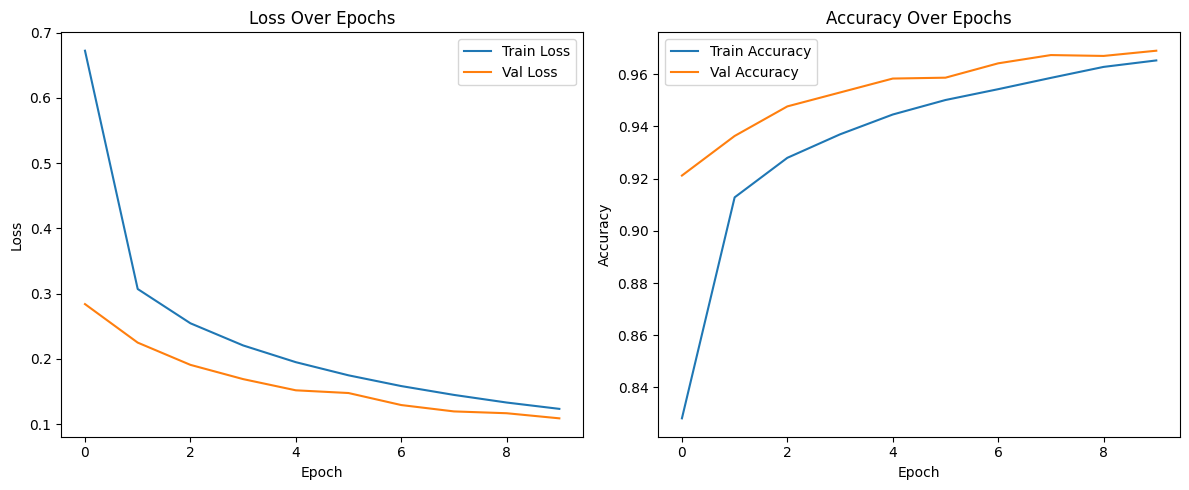

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


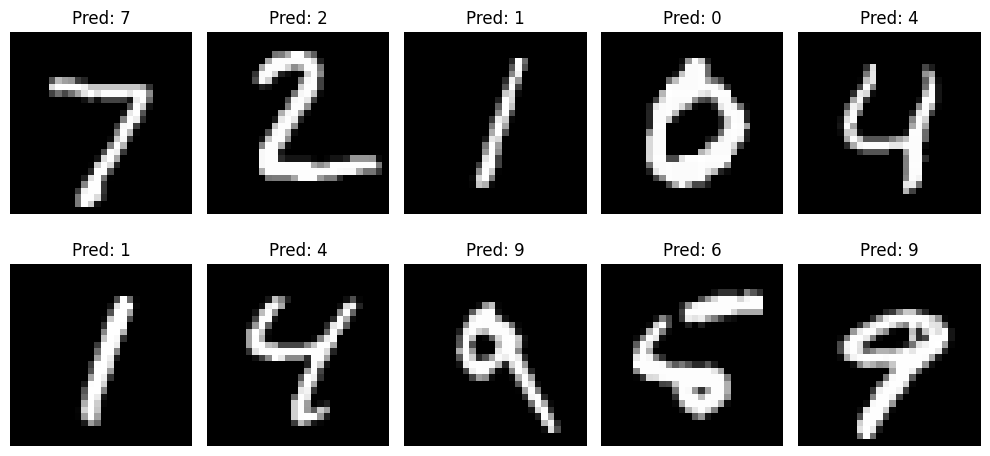


🧠 Analysis:
ReLU activation helps prevent vanishing gradients and speeds up learning.
SGD optimizer mimics manual gradient descent but is slower than Adam.
Changing the optimizer or adding dropout can improve generalization.



In [15]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

print("\n🧠 Analysis:")
print("ReLU activation helps prevent vanishing gradients and speeds up learning.")
print("SGD optimizer mimics manual gradient descent but is slower than Adam.")
print("Changing the optimizer or adding dropout can improve generalization.\n")
